In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


data = pd.read_excel('/Users/johnmantios1/Desktop/Διπλωματική/car evaluation/car_data1.xls', index_col=0)  

In [2]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,small,high,unacc
freq,432,432,432,576,576,576,1210


In [5]:
data.drop_duplicates()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 108.0+ KB


In [7]:
for col in data.columns:
    print(data[col].value_counts())

high     432
low      432
med      432
vhigh    432
Name: buying, dtype: int64
high     432
low      432
med      432
vhigh    432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
more    576
4       576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [8]:
X = data.drop(['class'], axis=1)
y = data['class']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [10]:
print(y_test.value_counts()) #we secured the 20% in the classes represenation

unacc    242
acc       77
good      14
vgood     13
Name: class, dtype: int64


In [11]:
mapping = [{'col':'buying', 'mapping':{'low':0, 'med':1, 'high':2, 'vhigh':3}},
          {'col':'maint', 'mapping':{'low':0, 'med':1, 'high':2, 'vhigh':3}},
          {'col':'doors', 'mapping':{'2':0, '3':1, '4':2, '5more':3}},
          {'col':'persons', 'mapping':{'2':0, '4':1, 'more':2}},
          {'col':'lug_boot', 'mapping':{'small':0, 'med':1, 'big':2}},
          {'col':'safety', 'mapping':{'low':0, 'med':1, 'high':2}}]

In [12]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['byuing', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], mapping = mapping)

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
           
X_train, y_train = sm.fit_sample(X_train, y_train) 

In [14]:
print(y_train.value_counts())

good     968
acc      968
vgood    968
unacc    968
Name: class, dtype: int64


# GINI criterion

In [15]:
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier

training_scores = []
test_scores = []

def tree_scores(i):
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state = 42)
    
    
    clf_gini.fit(X_train, y_train)
    y_pred_gini = clf_gini.predict_proba(X_test)
    y_pred_train_gini = clf_gini.predict_proba(X_train)
    
     
    print('Max Depth:' ,i)    
    print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
    training_scores.append(log_loss(y_train, y_pred_train_gini))

    print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))
    test_scores.append(log_loss(y_test, y_pred_gini))
     
        
for i in range(1,11):
    tree_scores(i)

Max Depth: 1
Training set score: 0.3701
Test set score: 0.5434
Max Depth: 2
Training set score: 0.4481
Test set score: 0.7803
Max Depth: 3
Training set score: 0.5607
Test set score: 0.6908
Max Depth: 4
Training set score: 0.7195
Test set score: 0.7861
Max Depth: 5
Training set score: 0.8383
Test set score: 0.8353
Max Depth: 6
Training set score: 0.9006
Test set score: 0.9306
Max Depth: 7
Training set score: 0.9078
Test set score: 0.9480
Max Depth: 8
Training set score: 0.9574
Test set score: 0.9711
Max Depth: 9
Training set score: 0.9762
Test set score: 0.9798
Max Depth: 10
Training set score: 0.9796
Test set score: 0.9884


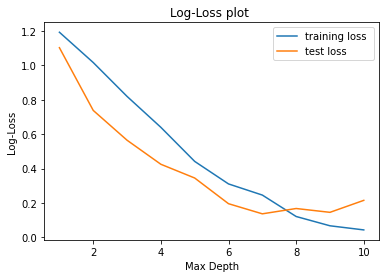

In [16]:
y = [1,2,3,4,5,6,7,8,9,10]

# plotting the line 1 points 
plt.plot(y, training_scores, label = "training loss ")

# plotting the line 2 points 
plt.plot(y, test_scores, label = "test loss ")
plt.xlabel('Max Depth')
# Set the y axis label of the current axis.
plt.ylabel('Log-Loss')
# Set a title of the current axes.
plt.title('Log-Loss plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(1,11)}
clf = GridSearchCV(DecisionTreeClassifier(criterion='gini', random_state = 42),  parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9733993498374593 {'max_depth': 10}


In [18]:
from sklearn.model_selection import cross_val_score

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state = 42)

print('Cross-Validation Score:',np.mean(cross_val_score(clf_gini, X_train, y_train, cv=10)))

Cross-Validation Score: 0.9067623005407709


In [19]:

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state = 42)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [20]:
y_pred_gini = clf_gini.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index is: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index is: 0.9480


In [22]:
y_pred_train_gini = clf_gini.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9078


In [23]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9078
Test set score: 0.9480


[Text(394.00243902439024, 407.7, 'X[5] <= 0.5\ngini = 0.75\nsamples = 3872\nvalue = [968, 968, 968, 968]'),
 Text(377.6707317073171, 353.34000000000003, 'gini = 0.0\nsamples = 465\nvalue = [0, 0, 465, 0]'),
 Text(410.3341463414634, 353.34000000000003, 'X[3] <= 0.5\ngini = 0.736\nsamples = 3407\nvalue = [968, 968, 503, 968]'),
 Text(394.00243902439024, 298.98, 'gini = 0.0\nsamples = 302\nvalue = [0, 0, 302, 0]'),
 Text(426.6658536585366, 298.98, 'X[0] <= 1.5\ngini = 0.704\nsamples = 3105\nvalue = [968, 968, 201, 968]'),
 Text(257.22439024390246, 244.62, 'X[5] <= 1.5\ngini = 0.656\nsamples = 2505\nvalue = [532, 968, 37, 968]'),
 Text(130.65365853658537, 190.26, 'X[1] <= 1.5\ngini = 0.499\nsamples = 892\nvalue = [319, 544, 29, 0]'),
 Text(65.32682926829268, 135.89999999999998, 'X[4] <= 0.5\ngini = 0.344\nsamples = 696\nvalue = [148, 544, 4, 0]'),
 Text(32.66341463414634, 81.54000000000002, 'X[2] <= 1.5\ngini = 0.438\nsamples = 104\nvalue = [73, 27, 4, 0]'),
 Text(16.33170731707317, 27.180

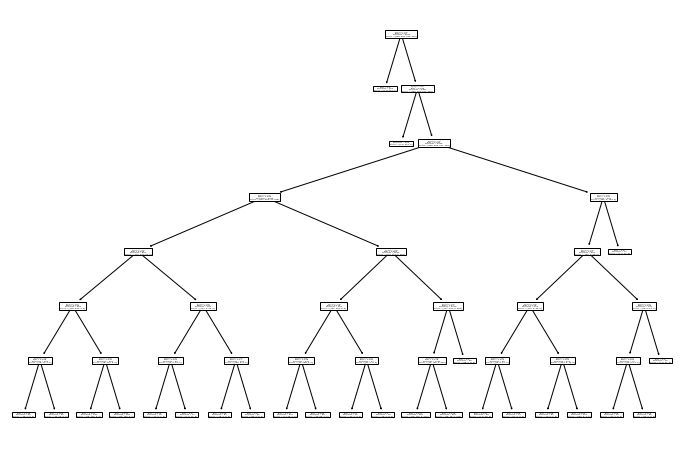

In [24]:
from sklearn import tree

plt.figure(figsize=(12,8))


tree.plot_tree(clf_gini.fit(X_train, y_train)) 

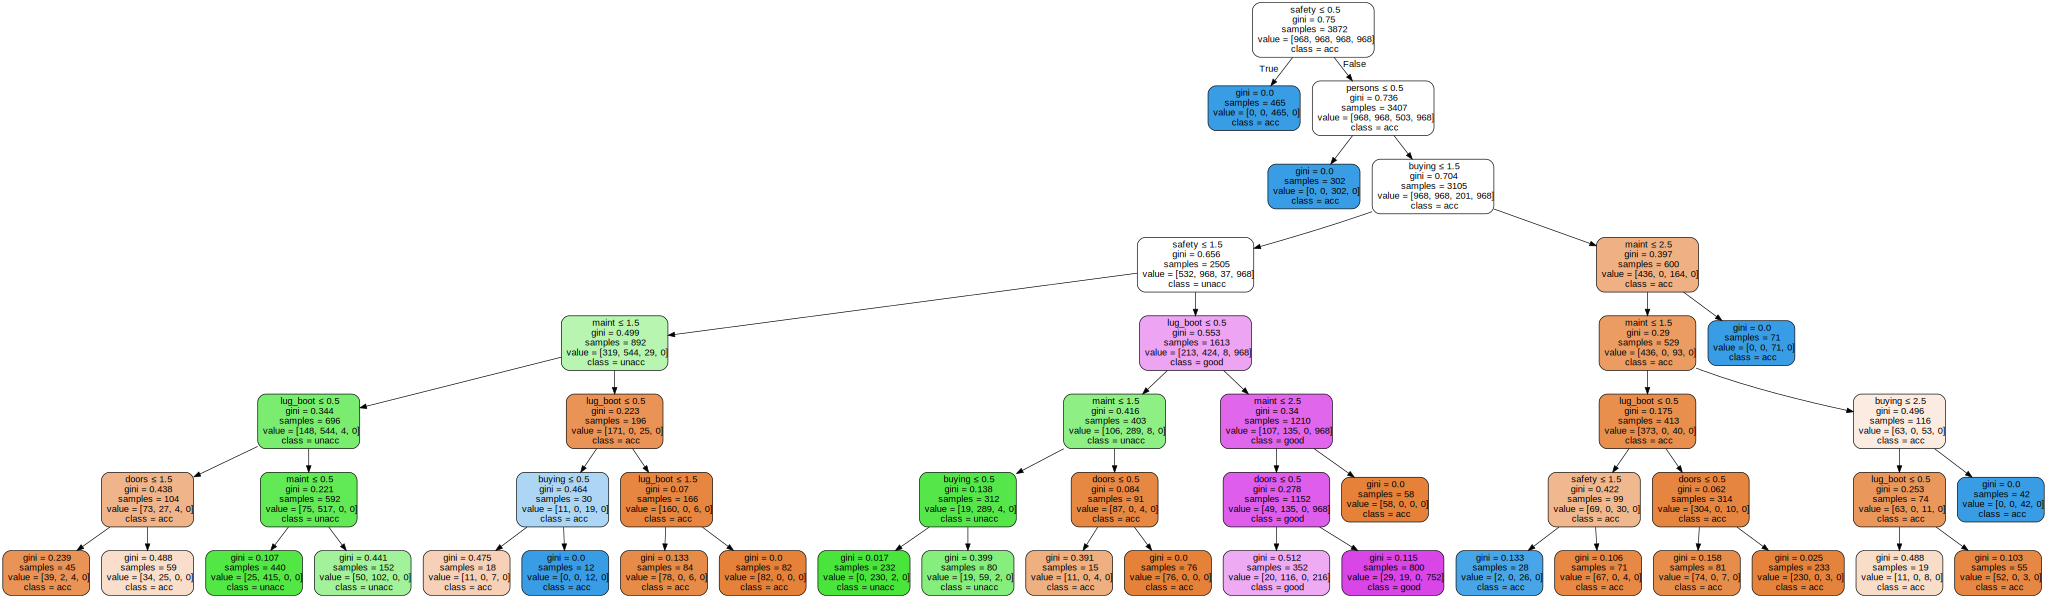

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import graphviz
from sklearn import tree



dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_gini)

cf_matrix

array([[ 67,   6,   0,   4],
       [  0,  14,   0,   0],
       [  8,   0, 234,   0],
       [  0,   0,   0,  13]])

[Text(0, 0.5, 'good'),
 Text(0, 1.5, 'unacc'),
 Text(0, 2.5, 'acc'),
 Text(0, 3.5, 'vgood')]

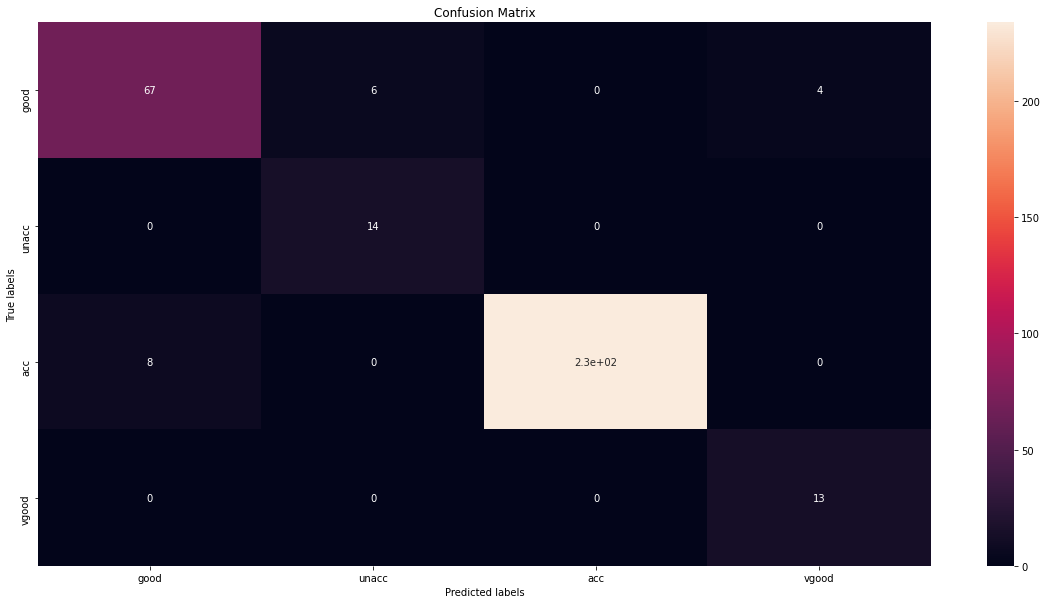

In [27]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax)  #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(y_test.unique())
ax.yaxis.set_ticklabels(y_test.unique())

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.89      0.87      0.88        77
        good       0.70      1.00      0.82        14
       unacc       1.00      0.97      0.98       242
       vgood       0.76      1.00      0.87        13

    accuracy                           0.95       346
   macro avg       0.84      0.96      0.89       346
weighted avg       0.96      0.95      0.95       346



# ENTROPY criterion

In [29]:
training_loss = []
test_loss = []

def tree_scores(i):
    clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state = 42)
    
    
    clf_en.fit(X_train, y_train)
    y_pred_en = clf_en.predict_proba(X_test)
    y_pred_train_en = clf_en.predict_proba(X_train)
    
     
    print('Max Depth:' ,i)    
    print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
    training_loss.append(log_loss(y_train, y_pred_train_en))

    print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))
    test_loss.append(log_loss(y_test, y_pred_en))
     
        
for i in range(1,11):
    tree_scores(i)

Max Depth: 1
Training set score: 0.3967
Test set score: 0.3757
Max Depth: 2
Training set score: 0.5669
Test set score: 0.2746
Max Depth: 3
Training set score: 0.7384
Test set score: 0.5925
Max Depth: 4
Training set score: 0.8267
Test set score: 0.7399
Max Depth: 5
Training set score: 0.8582
Test set score: 0.8497
Max Depth: 6
Training set score: 0.9277
Test set score: 0.9162
Max Depth: 7
Training set score: 0.9520
Test set score: 0.9538
Max Depth: 8
Training set score: 0.9682
Test set score: 0.9740
Max Depth: 9
Training set score: 0.9791
Test set score: 0.9682
Max Depth: 10
Training set score: 0.9853
Test set score: 0.9769


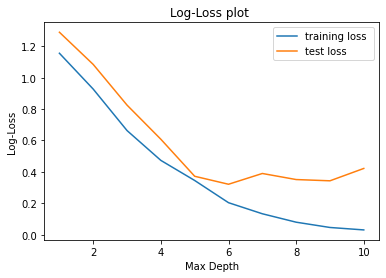

In [30]:
y = [1,2,3,4,5,6,7,8,9,10]

# plotting the line 1 points 
plt.plot(y, training_loss, label = "training loss ")

# plotting the line 2 points 
plt.plot(y, test_loss, label = "test loss ")
plt.xlabel('Max Depth')
# Set the y axis label of the current axis.
plt.ylabel('Log-Loss')
# Set a title of the current axes.
plt.title('Log-Loss plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [31]:
parameters = {'max_depth':range(1,11)}
clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state = 42),  parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9814050179211471 {'max_depth': 10}


In [32]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state = 42)

print('Cross-Validation Score:',np.mean(cross_val_score(clf_en, X_train, y_train, cv=20)))

Cross-Validation Score: 0.9253658992575182


In [33]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state = 42)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [34]:
y_pred_en = clf_en.predict(X_test)

In [35]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9277
Test set score: 0.9162


[Text(639.0608108108108, 504.7714285714286, 'X[0] <= 1.5\nentropy = 2.0\nsamples = 3872\nvalue = [968, 968, 968, 968]'),
 Text(312.93243243243245, 427.11428571428576, 'X[5] <= 1.5\nentropy = 1.905\nsamples = 2868\nvalue = [532, 968, 400, 968]'),
 Text(90.48648648648648, 349.4571428571429, 'X[5] <= 0.5\nentropy = 1.534\nsamples = 1178\nvalue = [319, 544, 315, 0]'),
 Text(60.32432432432432, 271.8, 'entropy = 0.0\nsamples = 218\nvalue = [0, 0, 218, 0]'),
 Text(120.64864864864865, 271.8, 'X[1] <= 1.5\nentropy = 1.327\nsamples = 960\nvalue = [319, 544, 97, 0]'),
 Text(60.32432432432432, 194.14285714285717, 'X[3] <= 0.5\nentropy = 1.014\nsamples = 732\nvalue = [148, 544, 40, 0]'),
 Text(30.16216216216216, 116.48571428571432, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36, 0]'),
 Text(90.48648648648648, 116.48571428571432, 'X[4] <= 0.5\nentropy = 0.796\nsamples = 696\nvalue = [148, 544, 4, 0]'),
 Text(60.32432432432432, 38.82857142857142, 'entropy = 1.044\nsamples = 104\nvalue = [73, 27, 4, 

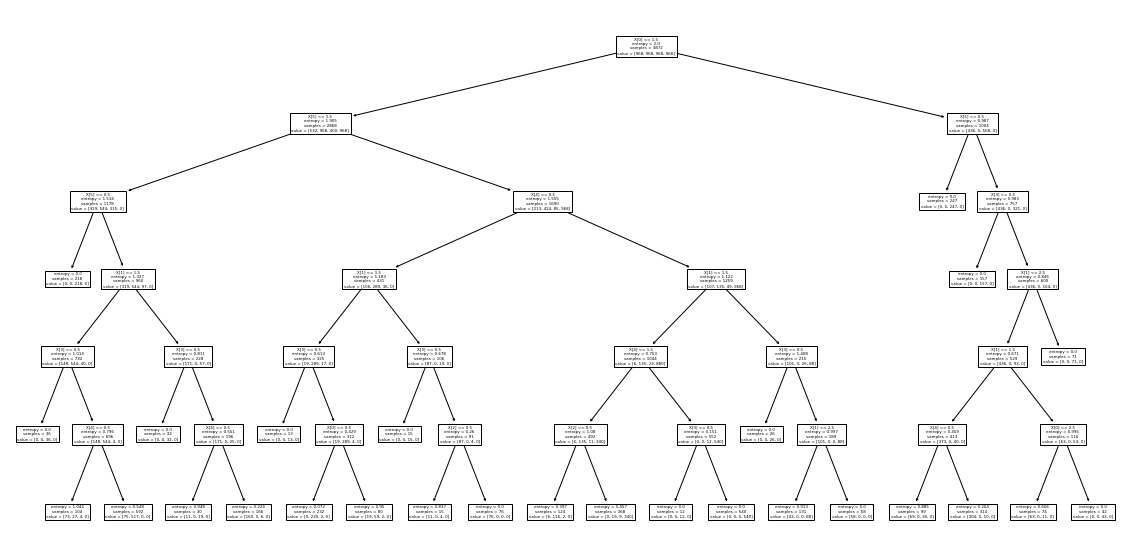

In [36]:
plt.figure(figsize=(20,10))


tree.plot_tree(clf_en.fit(X_train, y_train)) 

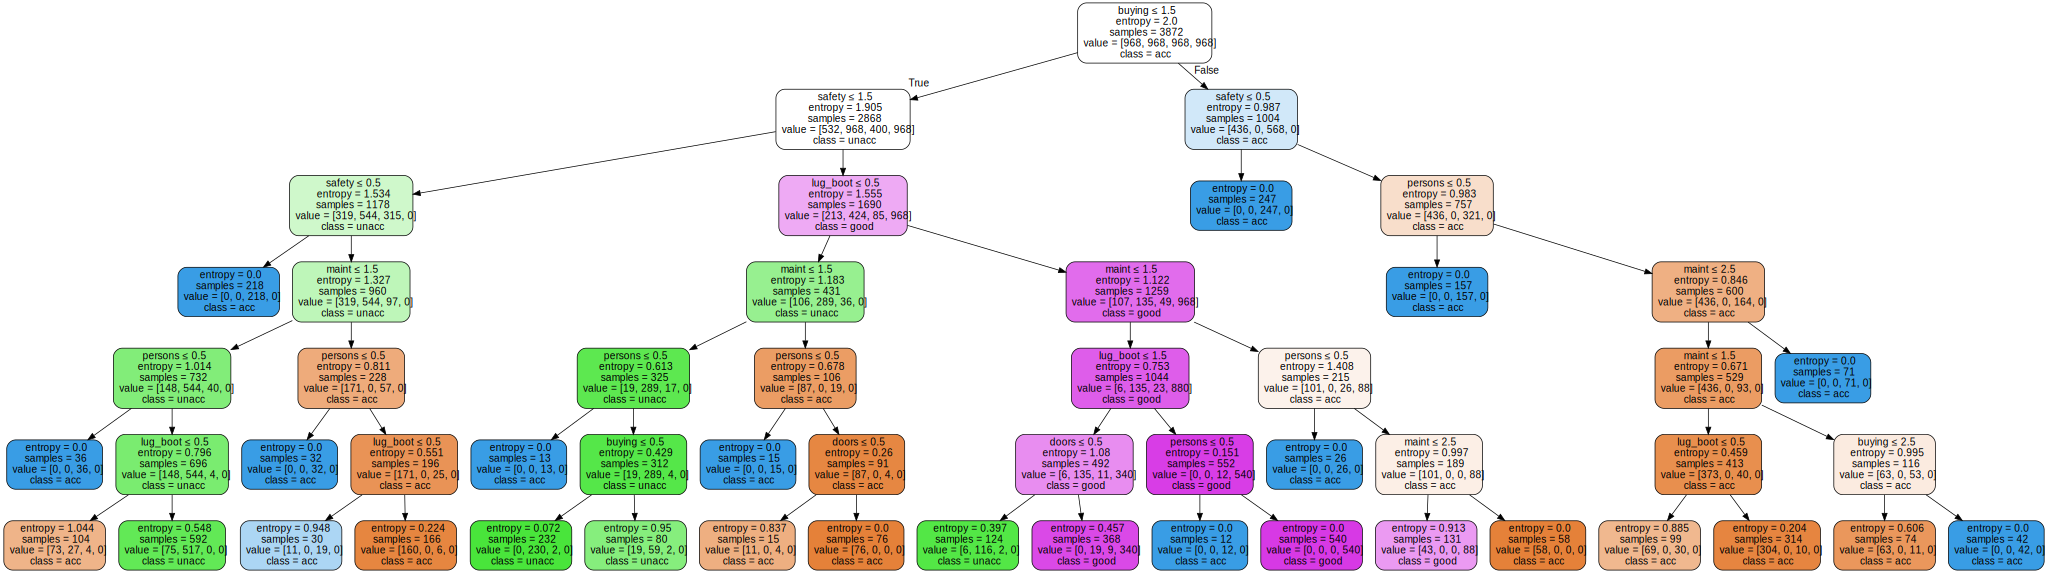

In [37]:
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [38]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 65   6   2   4]
 [  0  14   0   0]
 [ 12   2 225   3]
 [  0   0   0  13]]


[Text(0, 0.5, 'good'),
 Text(0, 1.5, 'unacc'),
 Text(0, 2.5, 'acc'),
 Text(0, 3.5, 'vgood')]

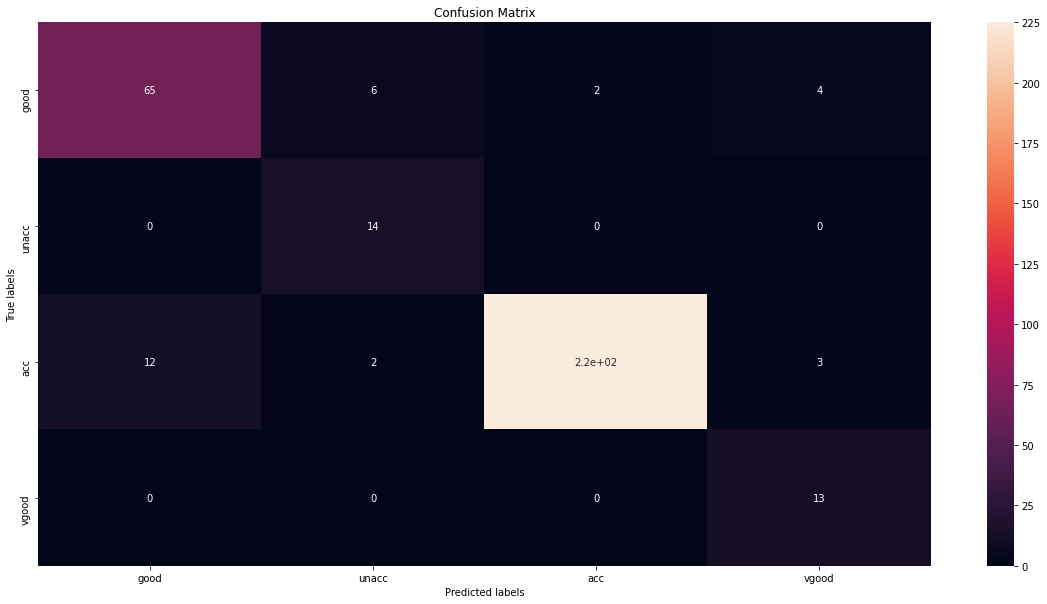

In [39]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)  #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(y_test.unique())
ax.yaxis.set_ticklabels(y_test.unique())

In [40]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.84      0.84      0.84        77
        good       0.64      1.00      0.78        14
       unacc       0.99      0.93      0.96       242
       vgood       0.65      1.00      0.79        13

    accuracy                           0.92       346
   macro avg       0.78      0.94      0.84       346
weighted avg       0.93      0.92      0.92       346



# GRADIENT BOOSTING

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

training_loss = []
test_loss = []

def tree_scores(i):
    clf_gb = GradientBoostingClassifier( max_depth=i, random_state = 42)
    
    
    clf_gb.fit(X_train, y_train.values.ravel())
    y_pred_gb = clf_gb.predict_proba(X_test)
    y_pred_train_gb = clf_gb.predict_proba(X_train)
    
     
    print('Max Depth:' ,i)    
    print('Training set score: {:.4f}'.format(clf_gb.score(X_train, y_train)))
    training_loss.append(log_loss(y_train, y_pred_train_gb))

    print('Test set score: {:.4f}'.format(clf_gb.score(X_test, y_test)))
    test_loss.append(log_loss(y_test, y_pred_gb))
     
        
for i in range(1,11):
    tree_scores(i)

Max Depth: 1
Training set score: 0.8871
Test set score: 0.8035
Max Depth: 2
Training set score: 0.9551
Test set score: 0.9335
Max Depth: 3
Training set score: 0.9793
Test set score: 0.9711
Max Depth: 4
Training set score: 0.9886
Test set score: 0.9827
Max Depth: 5
Training set score: 0.9904
Test set score: 0.9798
Max Depth: 6
Training set score: 0.9907
Test set score: 0.9855
Max Depth: 7
Training set score: 0.9907
Test set score: 0.9855
Max Depth: 8
Training set score: 0.9907
Test set score: 0.9855
Max Depth: 9
Training set score: 0.9907
Test set score: 0.9827
Max Depth: 10
Training set score: 0.9907
Test set score: 0.9798


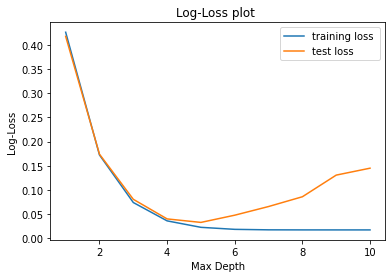

In [42]:
y = [1,2,3,4,5,6,7,8,9,10]

# plotting the line 1 points 
plt.plot(y, training_loss, label = "training loss ")

# plotting the line 2 points 
plt.plot(y, test_loss, label = "test loss ")
plt.xlabel('Max Depth')
# Set the y axis label of the current axis.
plt.ylabel('Log-Loss')
# Set a title of the current axes.
plt.title('Log-Loss plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [43]:
parameters = {'max_depth':range(1,11)}
clf = GridSearchCV(GradientBoostingClassifier( max_depth=i, random_state = 42),  parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train.values.ravel())
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9839883304159374 {'max_depth': 10}


In [44]:
clf_gb = GradientBoostingClassifier( max_depth=4, random_state = 42)

print('Cross-Validation Score:',np.mean(cross_val_score(clf_gb, X_train, y_train.values.ravel(), cv=10)))

Cross-Validation Score: 0.9832134580036762


In [45]:
clf_gb = GradientBoostingClassifier( max_depth=4, random_state = 42)

clf_gb.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(max_depth=4, random_state=42)

In [46]:
y_pred_gb = clf_gb.predict(X_test)

In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gb.score(X_test, y_test)))

Training set score: 0.9886
Test set score: 0.9827


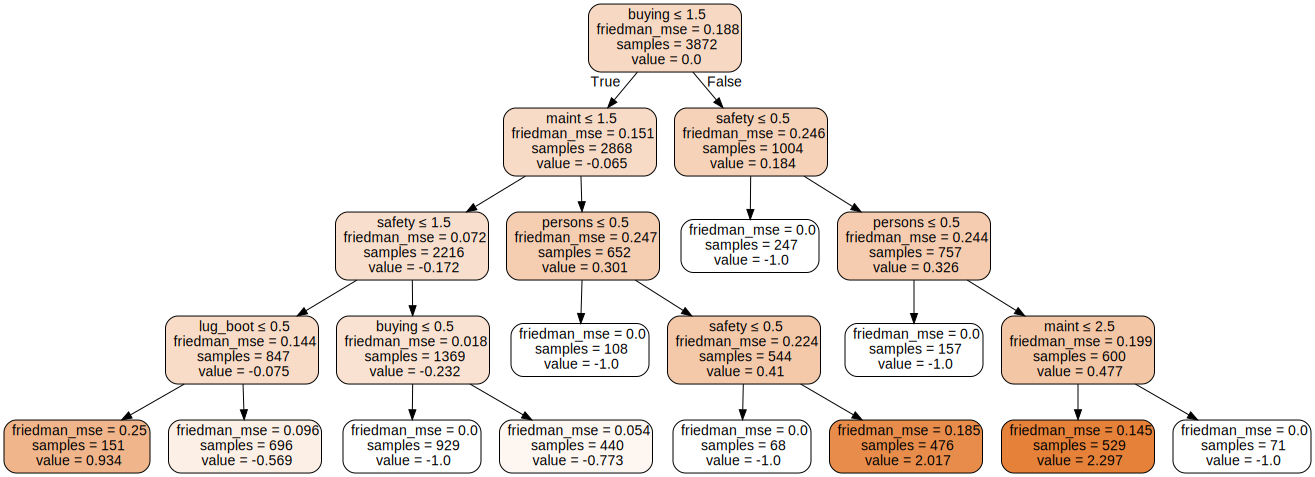

In [48]:
dot_data = tree.export_graphviz(clf_gb.estimators_[0, 0], out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=['1','2','3','4'],  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [49]:
cm = confusion_matrix(y_test, y_pred_gb)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 75   2   0   0]
 [  0  14   0   0]
 [  4   0 238   0]
 [  0   0   0  13]]


[Text(0, 0.5, 'good'),
 Text(0, 1.5, 'unacc'),
 Text(0, 2.5, 'acc'),
 Text(0, 3.5, 'vgood')]

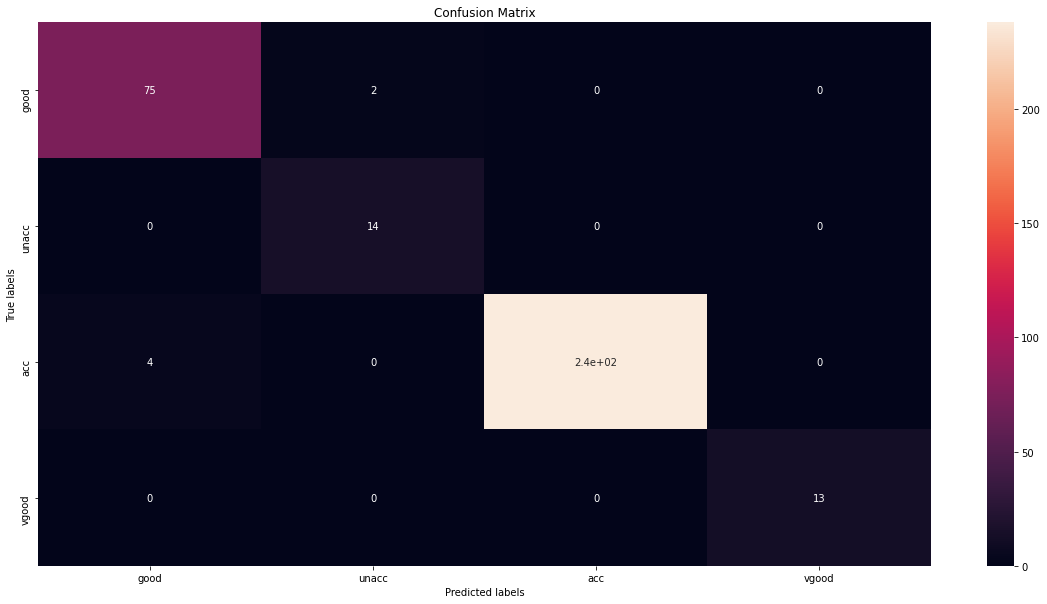

In [50]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)  #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(pd.unique(y_test.values.ravel()))
ax.yaxis.set_ticklabels(pd.unique(y_test.values.ravel()))

In [51]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         acc       0.95      0.97      0.96        77
        good       0.88      1.00      0.93        14
       unacc       1.00      0.98      0.99       242
       vgood       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.96      0.99      0.97       346
weighted avg       0.98      0.98      0.98       346



# XGBOOST

In [52]:
import xgboost as xgb

clf = xgb.XGBClassifier(max_depth=2, n_jobs = 4)

In [53]:
training_loss = []
test_loss = []

def tree_scores(i):
    clf_xgb = xgb.XGBClassifier( max_depth=i, random_state = 42, n_jobs = 4)
    
    
    clf_xgb.fit(X_train, y_train.values.ravel())
    y_pred_xgb = clf_xgb.predict_proba(X_test)
    y_pred_train_xgb = clf_xgb.predict_proba(X_train)
    
     
    print('Max Depth:' ,i)    
    print('Training set score: {:.4f}'.format(clf_xgb.score(X_train, y_train)))
    training_loss.append(log_loss(y_train, y_pred_train_xgb))

    print('Test set score: {:.4f}'.format(clf_xgb.score(X_test, y_test)))
    test_loss.append(log_loss(y_test, y_pred_xgb))
     
        
for i in range(1,11):
    tree_scores(i)

[13:21:18] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Depth: 1
Training set score: 0.9099
Test set score: 0.8699
[13:21:19] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Depth: 2
Training set score: 0.9700
Test set score: 0.9509
[13:21:19] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Depth: 3
Training set score: 0.9871
Test set score: 0.9740
[13:21:20] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Depth: 4
Training set score: 0.9902
Test set score: 0.9855
[13:21:21] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Depth: 5
Training set score: 0.9907
Test set score: 0.9827
[13:21:23] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Depth: 6
Training set score: 0.9907
Test set score: 0.9855
[13:21:25] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Depth: 7
Training set score: 0.9907
Test set score: 0.9855
[13:21:26] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Depth: 8
Training set score: 0.9907
Test set score: 0.9827
[13:21:27] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Depth: 9
Training set score: 0.9907
Test set score: 0.9827
[13:21:28] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Max Depth: 10
Training set score: 0.9907
Test set score: 0.9827


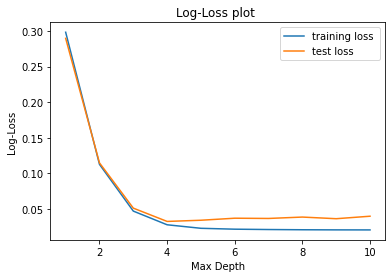

In [54]:
y = [1,2,3,4,5,6,7,8,9,10]

# plotting the line 1 points 
plt.plot(y, training_loss, label = "training loss ")

# plotting the line 2 points 
plt.plot(y, test_loss, label = "test loss ")
plt.xlabel('Max Depth')
# Set the y axis label of the current axis.
plt.ylabel('Log-Loss')
# Set a title of the current axes.
plt.title('Log-Loss plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [55]:
parameters = {'max_depth':range(1,11)}
clf = GridSearchCV(xgb.XGBClassifier( max_depth=i, random_state = 42),  parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train.values.ravel())
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:22:20] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9850219221472034 {'max_depth': 9}


In [56]:
clf_xgb = xgb.XGBClassifier( max_depth=4, random_state = 42, n_jobs = 4)

print('Cross-Validation Score:',np.mean(cross_val_score(clf_xgb, X_train, y_train.values.ravel(), cv=10)))

[13:22:22] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:22:22] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:23] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:24] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:26] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd li

In [57]:
clf_xgb = xgb.XGBClassifier( max_depth=4, random_state = 42, n_jobs = 4)

clf_xgb.fit(X_train, y_train.values.ravel())

[13:22:30] WARNING: xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_pred_xgb = clf_xgb.predict(X_test)

In [59]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_xgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_xgb.score(X_test, y_test)))

Training set score: 0.9902
Test set score: 0.9855


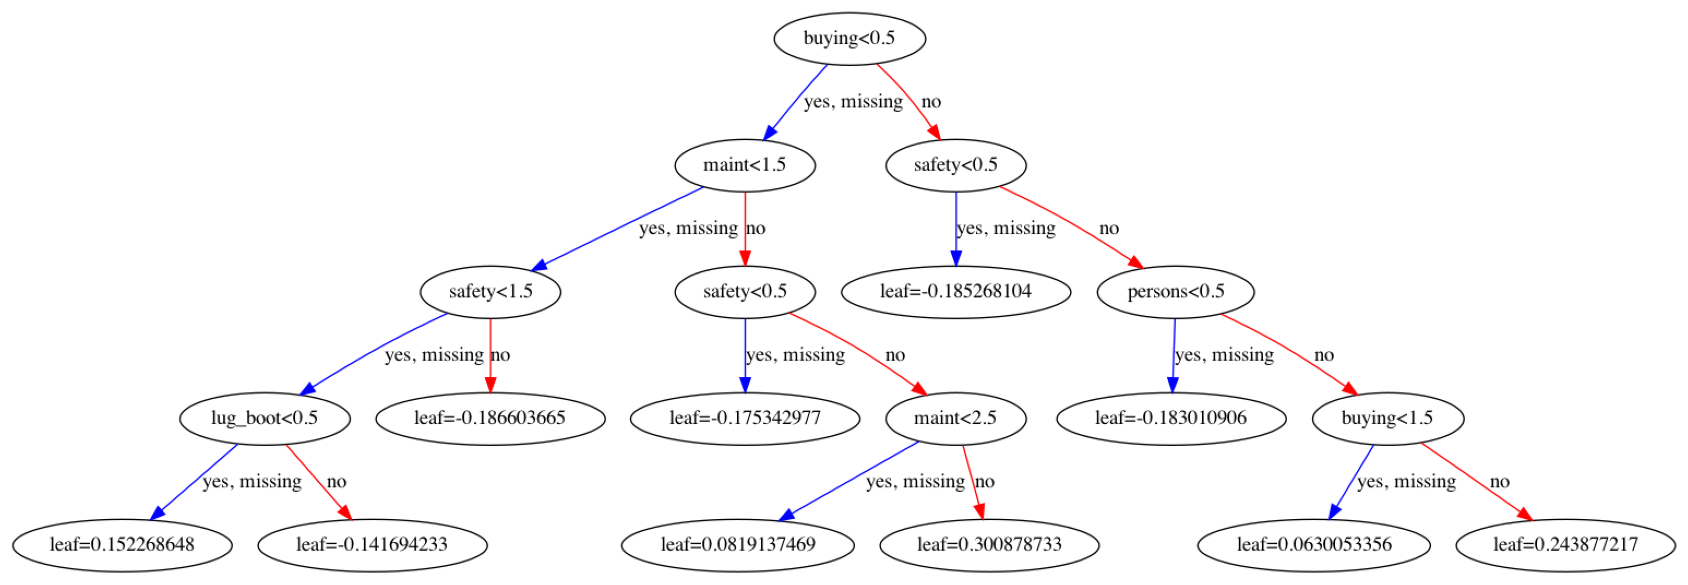

In [60]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(clf_xgb, num_trees=4, ax=ax)
plt.show()

In [61]:
cm = confusion_matrix(y_test, y_pred_xgb)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 74   2   0   1]
 [  0  14   0   0]
 [  2   0 240   0]
 [  0   0   0  13]]


[Text(0, 0.5, 'good'),
 Text(0, 1.5, 'unacc'),
 Text(0, 2.5, 'acc'),
 Text(0, 3.5, 'vgood')]

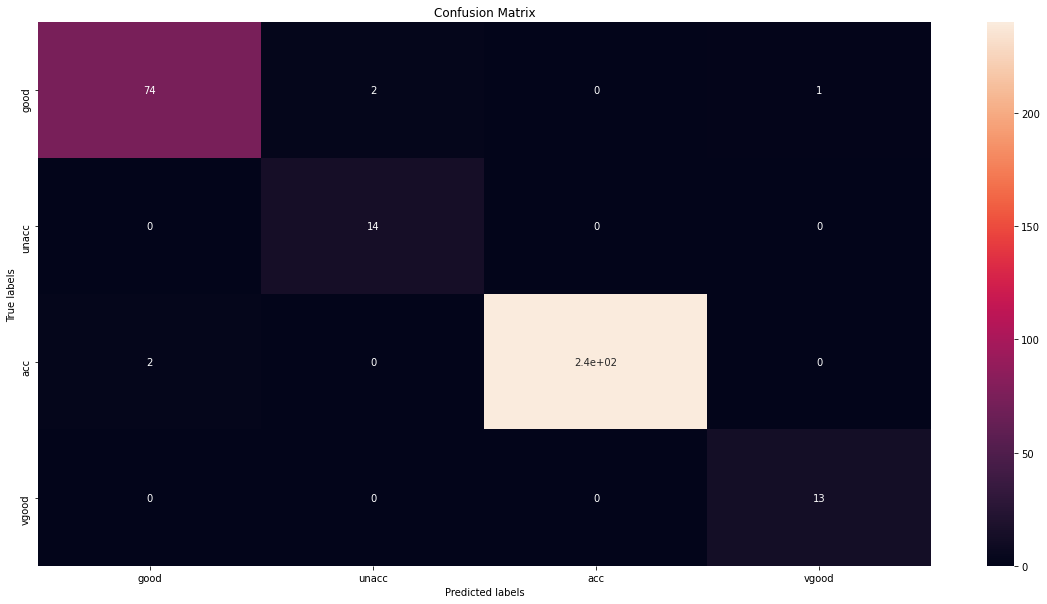

In [62]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)  #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(pd.unique(y_test.values.ravel()))
ax.yaxis.set_ticklabels(pd.unique(y_test.values.ravel()))

In [63]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         acc       0.97      0.96      0.97        77
        good       0.88      1.00      0.93        14
       unacc       1.00      0.99      1.00       242
       vgood       0.93      1.00      0.96        13

    accuracy                           0.99       346
   macro avg       0.94      0.99      0.96       346
weighted avg       0.99      0.99      0.99       346

